<a href="https://colab.research.google.com/github/mb1te/cm/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЛАБОРАТОРНАЯ РАБОТА 2**

**ИНТЕРПОЛЯЦИОННЫЙ МНОГОЧЛЕН В ФОРМАХ ЛАГРАНЖА И НЬЮТОНА**


$\textbf{Задание 1.1}$ Произвольно выбрать $5$ точек с абсциссами от $-1$ до $1$ и ординатами от $0$ до $1$ и построить интерполяционный многочлен Лагранжа. Какой степени многочлен будет построен?

Подключение библиотек

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import math

Вычисление значений функции многочленом Лагранжа:


In [109]:
def get_lagrange_value(x, y, t):
  n = len(x)
  ans = 0
  for i in range(n):
    nom, den = 1, 1
    for j in range(n):
      if i != j:
        nom *= t - x[j]
        den *= x[i] - x[j]
    ans += y[i] * nom / den
  return ans

Генерация пяти случайных точек

In [112]:
gen_x = 2 * np.random.random(5) - 1
gen_y = np.random.random(5)
print("x: ", gen_x, "\ny: ", gen_y)

x:  [ 0.86785362  0.23557884 -0.28025076  0.26861858  0.8246844 ] 
y:  [0.28742778 0.09244809 0.96034147 0.8285557  0.09345681]


Построение по ним многочлена Лагранжа и вывод графика

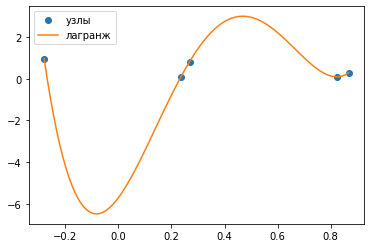

In [113]:
x_coords = np.linspace(np.min(gen_x), np.max(gen_x), 100)
y_coords = [get_lagrange_value(gen_x, gen_y, i) for i in x_coords]
plt.plot(gen_x, gen_y, 'o', label="узлы")
plt.plot(x_coords, y_coords, label="лагранж")
plt.legend()
plt.show()

Построен многочлен Лагранжа $4$ степени, в заданных узлах его значения совпадают с исходными

$\textbf{Задание 1.2}$ Аппроксимировать заданную функцию f(x) многочленом $L_n(x)$,
$f(x) = \frac{1}{1+7x^2}, x \in [-1,1]$;

а) равномерное разбиение при $n = 4; 10; 20;$ при этом $x_i=-1+ih$, $h=\frac{2}{n}$, $i = \overline{0, n}$.

n =  4


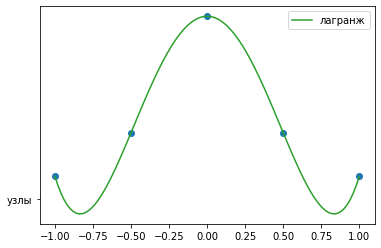

n =  10


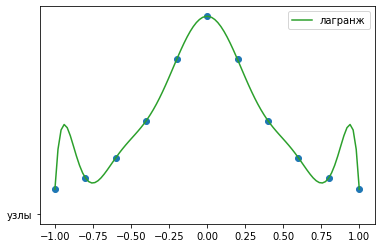

n =  20


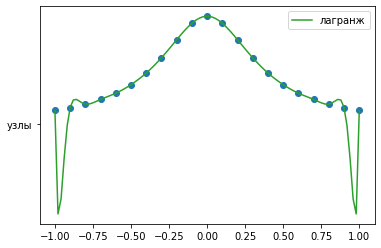

In [114]:
def f(x):
  return 1 / (1 + 7 * x * x)
for n in [4, 10, 20]:
  print("n = ", n)
  h = 2 / n
  x = np.array([(-1 + i * h) for i in range(n + 1)])
  y = np.array([f(x[i]) for i in range(n + 1)])
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [get_lagrange_value(x, y, i) for i in x_coords]
  plt.plot(x, y, "o", "узлы")
  plt.plot(x_coords, y_coords, label="лагранж")
  plt.legend()
  plt.show()



б) узлы интерполяции - нули многочлена Чебышева $1$-го рода $T_{n+1}(x)$:

$x_i=\cos\left(\frac{(2i+1)\pi}{N}\right), N = 2 (n+1), i= \overline{0, n}$

n =  4


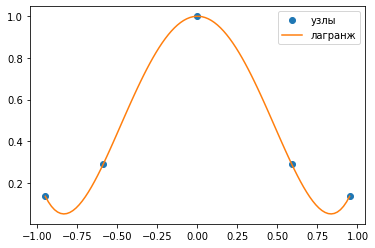

n =  10


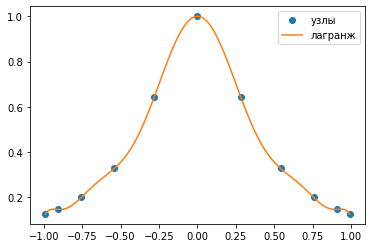

n =  20


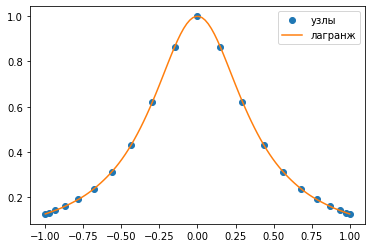

In [115]:
def get_x(i, N):
  return np.cos((2 * i + 1) * np.pi / N)
for n in [4, 10, 20]:
  print("n = ", n)
  N = 2 * (n + 1)
  x = np.array([get_x(i, N) for i in range(n + 1)])
  y = np.array([f(x[i]) for i in range(n + 1)])
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [get_lagrange_value(x, y, i) for i in x_coords]
  plt.plot(x, y, "o", label="узлы")
  plt.plot(x_coords, y_coords, label="лагранж")
  plt.legend()
  plt.show()

$\textbf{Задание 2.}$ Используя графическое представление $L_n(x)$ на $[a,b]$, исследовать сходимость интерполяционного процесса для заданной функции.

n =  4


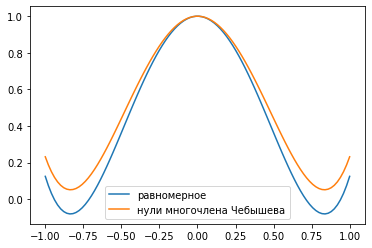

n =  10


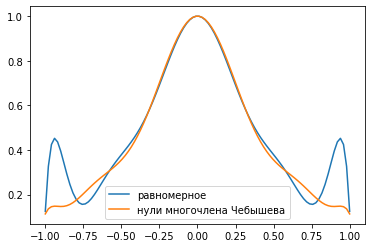

n =  20


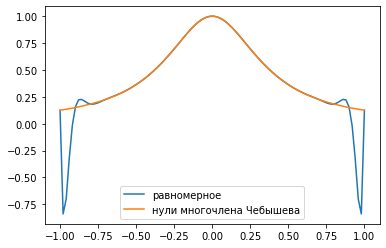

In [116]:
for n in [4, 10, 20]:
  print("n = ", n)
  h = 2 / n
  x1 = np.array([(-1 + i * h) for i in range(n + 1)])
  y1 = np.array([f(x1[i]) for i in range(n + 1)])
  x_coords1 = np.linspace(-1, 1, 100)
  y_coords1 = [get_lagrange_value(x1, y1, i) for i in x_coords1]

  N = 2 * (n + 1)
  x2 = np.array([get_x(i, N) for i in range(n + 1)])
  y2 = np.array([f(x2[i]) for i in range(n + 1)])
  x_coords2 = np.linspace(-1, 1, 100)
  y_coords2 = [get_lagrange_value(x2, y2, i) for i in x_coords2]
  plt.plot(x_coords1, y_coords1, label="равномерное")
  plt.plot(x_coords2, y_coords2, label="нули многочлена Чебышева")
  plt.legend()
  plt.show()

$\textbf{Задание 3.1}$ Произвольно выбрать те же 5 точек с абсциссами от -1 до 1 и ординатами от 0 до 1, что и в первом задании, построить интерполяционный многочлен Ньютона и убедиться, что он идентичен многочлену Лагранжа.

Функция вычисления разделенных разностей:

In [117]:
def get_divided_dif(x, y):
  dif = [[0 for j in range(len(x))] for i in range(len(x) + 1)]
  for i in range(len(x) - 1):
    dif[2][i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])
  for i in range(3, len(x) + 1):
    for j in range(0, len(x) - i + 1):
      dif[i][j] = (dif[i - 1][j + 1] - dif[i - 1][j]) / (x[j + i - 1] - x[j])
  return dif

Функция вычисления значений многочлена Ньютона в точке:

In [118]:
def get_newton_value(x, y, t):
  dif = get_divided_dif(x, y)
  ans = y[0]
  for i in range(1, len(x)):
    cur = dif[i + 1][0]
    for j in range(i):
      cur *= (t - x[j])
    ans += cur
  return ans

Сравнение результатов интереполяции полиномами Лагранжа и Ньютона

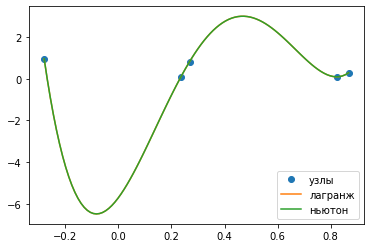

In [119]:
x_coords = np.linspace(np.min(gen_x), np.max(gen_x), 100)
y_coords_lagrange = [get_lagrange_value(gen_x, gen_y, i) for i in x_coords]
y_coords_newton = [get_newton_value(gen_x, gen_y, i) for i in x_coords]

plt.plot(gen_x, gen_y, "o", label="узлы")
plt.plot(x_coords, y_coords_lagrange, label="лагранж")
plt.plot(x_coords, y_coords_newton, label="ньютон")
plt.legend()
plt.show()

$\textbf{Задание 3.2}$ Аппроксимировать заданную функцию $f(x)$ интерполяционным многочленом в любой форме при $x\in[-1,1]; x_i=-1+ih, h=\frac{2}{n}, i = \overline{0,n}; n=10,20$

А) $f(x)=|x|$

n =  10


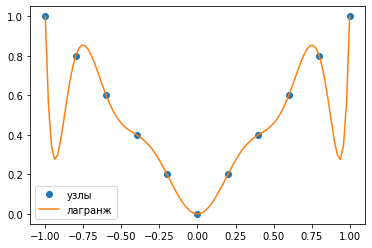

n =  20


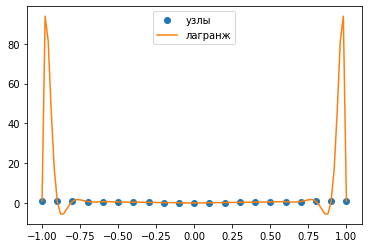

In [120]:
def f(x):
  return abs(x)
for n in [10, 20]:
  print("n = ", n)
  h = 2 / n
  x = [(-1 + i * h) for i in range(n + 1)]
  y = [f(x[i]) for i in range(n + 1)]
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [get_lagrange_value(x, y, i) for i in x_coords]

  plt.plot(x, y, "o", label="узлы")
  plt.plot(x_coords, y_coords, label="лагранж")
  plt.legend()
  plt.show()

Как мы видим, процесс расходится.

Б) $f(x)=x^3$

n =  10


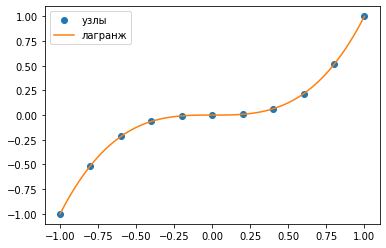

n =  20


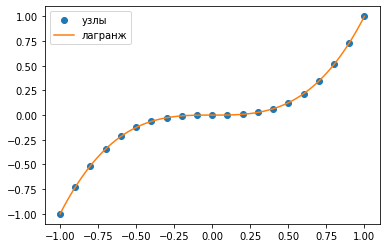

In [121]:
def f(x):
  return x**3
for n in [10, 20]:
  print("n = ", n)
  h = 2 / n
  x = [(-1 + i * h) for i in range(n + 1)]
  y = [f(x[i]) for i in range(n + 1)]
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [get_lagrange_value(x, y, i) for i in x_coords]

  plt.plot(x, y, "o", label="узлы")
  plt.plot(x_coords, y_coords, label="лагранж")
  plt.legend()
  plt.show()

В) $f(x)=\cos\left(\frac{\pi x}{2}\right)$

n =  10


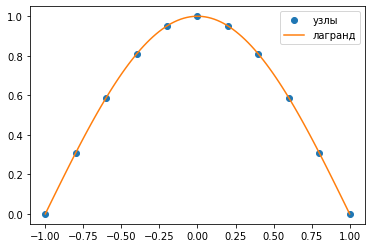

n =  20


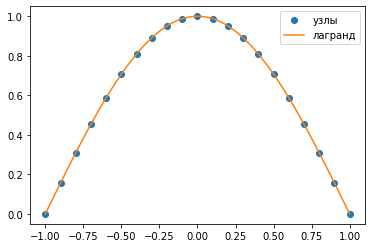

In [122]:
def f(x):
  return math.cos(math.pi * x / 2)
for n in [10, 20]:
  print("n = ", n)
  h = 2 / n
  x = [(-1 + i * h) for i in range(n + 1)]
  y = [f(x[i]) for i in range(n + 1)]
  x_coords = np.linspace(np.min(x), np.max(x), 100)
  y_coords = [get_lagrange_value(x, y, i) for i in x_coords]

  plt.plot(x, y, "o", label="узлы")
  plt.plot(x_coords, y_coords, label="лагранд")
  plt.legend()
  plt.show()